In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [3]:
df2_KT = pd.read_csv('방문객_KT/20230510121505_광역별 방문자 수.csv', encoding='cp949')
df2_SKT = pd.read_csv('방문객_SKT/20230508105058_광역별 방문자 수.csv', encoding='cp949')
df4 = pd.read_csv('관광검색건수/20230508100008_지역별 검색건수.csv', encoding='cp949')

In [4]:
df2_KT

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,춘천시,3.015669e+09,3.6,487171589.0,16.2
1,강원도,원주시,3.015669e+09,3.6,528889778.0,17.5
2,강원도,강릉시,3.015669e+09,3.6,447200533.0,14.8
3,강원도,동해시,3.015669e+09,3.6,162347163.0,5.4
4,강원도,태백시,3.015669e+09,3.6,86282413.0,2.9
...,...,...,...,...,...,...
245,충청북도,증평군,2.595677e+09,3.1,69344337.0,2.7
246,충청북도,진천군,2.595677e+09,3.1,132093867.0,5.1
247,충청북도,괴산군,2.595677e+09,3.1,73701030.0,2.8
248,충청북도,음성군,2.595677e+09,3.1,179493504.0,6.9


In [5]:
df_KT = df2_KT[(df2_KT['광역지자체명'] == '서울특별시')][['기초지자체명', '기초지자체 방문자 수']]
df_KT

,기초지자체명,기초지자체 방문자 수
140,종로구,8.845861e+08
141,중구,9.049302e+08
142,용산구,7.288318e+08
143,성동구,5.564457e+08
144,광진구,6.886543e+08
145,동대문구,5.704249e+08
146,중랑구,4.836634e+08
147,성북구,6.286009e+08
148,강북구,4.028052e+08
149,도봉구,3.578657e+08


In [6]:
df_KT = df_KT.rename(columns={'기초지자체명': '기초지자체'})
df_KT

,기초지자체,기초지자체 방문자 수
140,종로구,8.845861e+08
141,중구,9.049302e+08
142,용산구,7.288318e+08
143,성동구,5.564457e+08
144,광진구,6.886543e+08
145,동대문구,5.704249e+08
146,중랑구,4.836634e+08
147,성북구,6.286009e+08
148,강북구,4.028052e+08
149,도봉구,3.578657e+08


In [7]:
df_search = df4[(df4['광역지자체']=='서울특별시')][['기초지자체', '기초지자체 검색건수']]
df_search

,기초지자체,기초지자체 검색건수
140,강남구,43394774
141,강동구,5242181
142,강북구,3486177
143,강서구,21143522
144,관악구,3950031
145,광진구,8142556
146,구로구,4850887
147,금천구,4770106
148,노원구,7808577
149,도봉구,2877934


In [8]:
df_merged = df_KT.merge(df_search, how='left', on='기초지자체')
df_merged

,기초지자체,기초지자체 방문자 수,기초지자체 검색건수
0,종로구,8.845861e+08,12597029
1,중구,9.049302e+08,21059288
2,용산구,7.288318e+08,13101151
3,성동구,5.564457e+08,6565098
4,광진구,6.886543e+08,8142556
5,동대문구,5.704249e+08,4280601
6,중랑구,4.836634e+08,4477188
7,성북구,6.286009e+08,4693707
8,강북구,4.028052e+08,3486177
9,도봉구,3.578657e+08,2877934


In [9]:
corr_matrix = df_merged.corr()
corr_matrix

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10940\324289728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_merged.corr()


,기초지자체 방문자 수,기초지자체 검색건수
기초지자체 방문자 수,1.000000,0.920486
기초지자체 검색건수,0.920486,1.000000


In [10]:
corr_coef = df_merged['기초지자체 방문자 수'].corr(df_merged['기초지자체 검색건수'])
corr_coef

# A correlation coefficient of 0.9204863426487895 is generally considered a high correlation. 
# The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 
# 0 indicates no correlation, and 1 indicates a perfect positive correlation. 
# A correlation coefficient of 0.9204863426487895 
# indicates a very strong positive correlation between the two variables.

0.9204863426487895

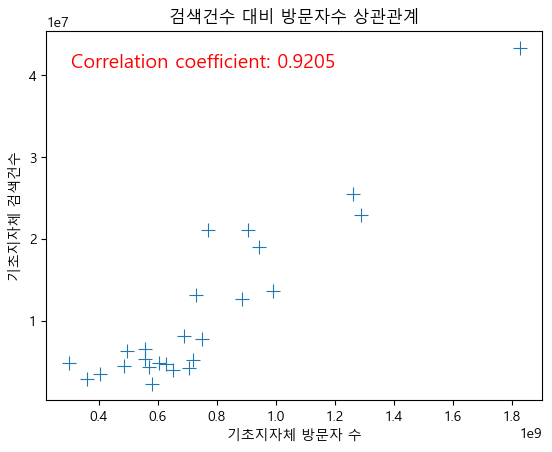

In [17]:
sns.scatterplot(data=df_merged, x='기초지자체 방문자 수', y='기초지자체 검색건수', marker='+', s=100)
plt.annotate(f"Correlation coefficient: {corr_coef:.4f}", xy=(0.05, 0.90), xycoords='axes fraction'
            , fontsize=14, color='red')
plt.title('검색건수 대비 방문자수 상관관계')
plt.show()

# 지출액을 방문자수와 검색수와도 상관관계분석할것